Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping

Importing the dataset -> microclimate-sensors-data.csv

In [ ]:
df = pd.read_csv("microclimate-sensors-data.csv")
df.tail()

,Device_id,Time,SensorLocation,LatLong,MinimumWindDirection,AverageWindDirection,MaximumWindDirection,MinimumWindSpeed,AverageWindSpeed,GustWindSpeed,AirTemperature,RelativeHumidity,AtmosphericPressure,PM25,PM10,Noise
335416,ICTMicroclimate-07,2025-05-16T02:56:01+10:00,Tram Stop 7C - Melbourne Tennis Centre Precinc...,"-37.8222341, 144.9829409",0.0,31.0,356.0,0.0,1.1,2.7,8.8,82.3,1022.3,19.0,21.0,54.8
335417,ICTMicroclimate-03,2025-05-16T02:55:45+10:00,CH1 rooftop,"-37.8140348, 144.96728",0.0,343.0,0.0,0.5,0.6,0.5,11.0,85.9,1014.0,35.0,41.0,69.0
335418,ICTMicroclimate-08,2025-05-16T03:00:00+10:00,Swanston St - Tram Stop 13 adjacent Federation...,"-37.8184515, 144.9678474",0.0,128.0,193.0,0.0,0.4,1.7,8.7,84.4,1020.1,21.0,21.0,61.0
335419,ICTMicroclimate-06,2025-05-16T03:12:56+10:00,Tram Stop 7B - Melbourne Tennis Centre Precinc...,"-37.8194993, 144.9787211",0.0,67.0,348.0,0.0,0.6,1.7,8.5,83.1,1019.7,14.0,17.0,53.3
335420,ICTMicroclimate-03,2025-05-16T03:10:48+10:00,CH1 rooftop,"-37.8140348, 144.96728",0.0,326.0,352.0,0.0,0.4,0.8,10.8,86.3,1013.8,36.0,43.0,71.3


Data preprocessing


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df['Time'] = pd.to_datetime(df['Time'], errors='coerce', utc=True)

# Dropping invalid time rows
df = df.dropna(subset=['Time']).copy()

# Extract time features
df['hour'] = df['Time'].dt.hour
df['day'] = df['Time'].dt.day

# Select features
features = ['AirTemperature', 'RelativeHumidity', 'PM25', 'PM10', 'hour', 'day']
df_model = df[features]
df_model = df_model.fillna(df_model.mean(numeric_only=True))

# Split and scale
X = df_model.drop('AirTemperature', axis=1)
y = df_model['AirTemperature']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


Task 1: Preparing data for regression

In [ ]:
# Select relevant features
features = ['AirTemperature', 'RelativeHumidity', 'PM25', 'PM10', 'hour', 'day']
df_model = df[features]

# Fill missing values with column means
df_model = df_model.fillna(df_model.mean(numeric_only=True))

# Split into features (X) and target (y)
X = df_model.drop('AirTemperature', axis=1)
y = df_model['AirTemperature']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Applying linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr.predict(X_test)

# Evaluate the model
print("Linear Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R²:", r2_score(y_test, y_pred_lr))

Linear Regression Results:
MAE: 3.584424772784564
RMSE: 4.321016785123062
R²: 0.4979291786538911


Visualize the results from Linear Regression

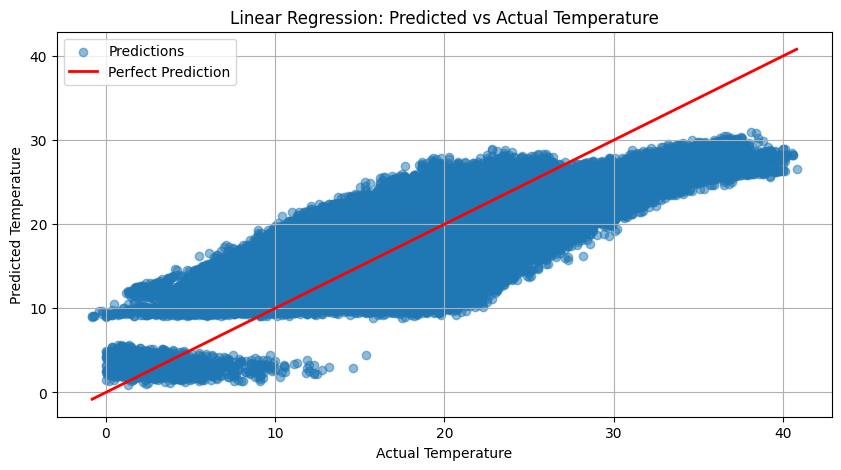

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.5, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Linear Regression: Predicted vs Actual Temperature')
plt.legend()
plt.grid(True)
plt.show()


Other features used

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Convert and clean datetime
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
df = df.dropna(subset=['Time'])

# Extract time features
df['hour'] = df['Time'].dt.hour
df['day'] = df['Time'].dt.day

# Select expanded features
features = [
    'AirTemperature',
    'RelativeHumidity',
    'PM25',
    'PM10',
    'hour',
    'day',
    'AverageWindSpeed',
    'GustWindSpeed',
    'AtmosphericPressure',
    'Noise'
]

# Keep only necessary columns and fill missing values
df_model = df[features].copy()
df_model = df_model.fillna(df_model.mean(numeric_only=True))

# Split data
X = df_model.drop('AirTemperature', axis=1)
y = df_model['AirTemperature']

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluate
print("Linear Regression with More Features:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))



Linear Regression with More Features:
MAE: 3.183103467848461
RMSE: 3.8838875018241885
R²: 0.5943734632160029


Visualization

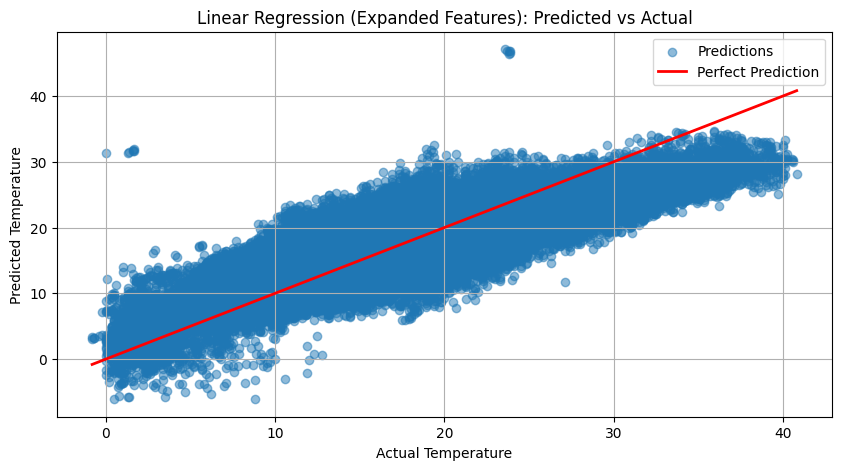

In [ ]:
# Visualize
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Linear Regression (Expanded Features): Predicted vs Actual')
plt.legend()
plt.grid(True)
plt.show()

SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize SVR model
svr = SVR()
svr.fit(X_train, y_train)

# Predict
y_pred_svr = svr.predict(X_test)

# Evaluate
print("SVR Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_svr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_svr)))
print("R²:", r2_score(y_test, y_pred_svr))

Visualization


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_svr, alpha=0.5, color='green', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('SVR: Predicted vs Actual Temperature')
plt.legend()
plt.grid(True)
plt.show()


XGBoost

In [ ]:
!pip install xgboost


In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor


In [ ]:
# Convert and clean datetime
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
df = df.dropna(subset=['Time'])

# Extract time features
df['hour'] = df['Time'].dt.hour
df['day'] = df['Time'].dt.day

# Feature list
features = [
    'AirTemperature',
    'RelativeHumidity',
    'PM25',
    'PM10',
    'hour',
    'day',
    'AverageWindSpeed',
    'GustWindSpeed',
    'AtmosphericPressure',
    'Noise'
]

# Prepare and clean
df_model = df[features].copy()
df_model = df_model.fillna(df_model.mean(numeric_only=True))

X = df_model.drop('AirTemperature', axis=1)
y = df_model['AirTemperature']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [ ]:
print("XGBoost Regressor Results:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))


Visualization of XGBoost

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='purple', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('XGBoost: Predicted vs Actual Temperature')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print("Number of features (columns):", df.shape[1])
print("Feature names:", df.columns.tolist())


Number of features (columns): 18
Feature names: ['Device_id', 'Time', 'SensorLocation', 'LatLong', 'MinimumWindDirection', 'AverageWindDirection', 'MaximumWindDirection', 'MinimumWindSpeed', 'AverageWindSpeed', 'GustWindSpeed', 'AirTemperature', 'RelativeHumidity', 'AtmosphericPressure', 'PM25', 'PM10', 'Noise', 'hour', 'day']


CNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

#Pad features to reach 25 (for 5x5 CNN input)
def pad_features(df, target_size=25):
    current_size = df.shape[1]
    padding = target_size - current_size
    if padding > 0:
        padding_array = np.zeros((df.shape[0], padding))
        df_padded = np.hstack([df, padding_array])
        return df_padded
    return df.values

#Pad train and test sets
X_train_padded = pad_features(X_train, 25)
X_test_padded = pad_features(X_test, 25)

#Reshape to 5x5 grid with 1 channel
X_train_cnn = X_train_padded.reshape(-1, 5, 5, 1)
X_test_cnn = X_test_padded.reshape(-1, 5, 5, 1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
5870/5870 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step - loss: 23.4229 - val_loss: 13.3543
Epoch 2/100
5870/5870 ━━━━━━━━━━━━━━━━━━━━ 43s 6ms/step - loss: 16.9098 - val_loss: 12.1586
Epoch 3/100
5870/5870 ━━━━━━━━━━━━━━━━━━━━ 33s 6ms/step - loss: 15.6343 - val_loss: 14.6784
Epoch 4/100
5870/5870 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - loss: 14.9676 - val_loss: 12.3215
Epoch 5/100
5870/5870 ━━━━━━━━━━━━━━━━━━━━ 42s 6ms/step - loss: 14.3270 - val_loss: 11.7144
Epoch 6/100
5870/5870 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - loss: 13.7759 - val_loss: 13.0689
Epoch 7/100
5870/5870 ━━━━━━━━━━━━━━━━━━━━ 34s 6ms/step - loss: 13.4292 - val_loss: 11.2817
Epoch 8/100
5870/5870 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - loss: 13.2025 - val_loss: 12.1613
Epoch 9/100
5870/5870 ━━━━━━━━━━━━━━━━━━━━ 45s 6ms/step - loss: 12.7889 - val_loss: 21.7271
Epoch 10/100
5870/5870 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step - loss: 12.3982 - val_loss: 13.9888
Epoch 11/100
5870/5870 ━━━━━━━━━━━━━━━━━━━━ 33s 6ms/step - loss: 11.9745 - val_

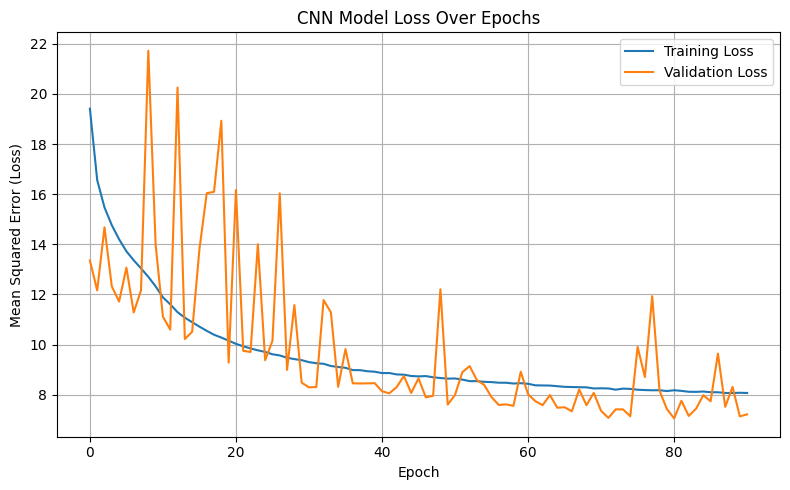

In [ ]:
import matplotlib.pyplot as plt
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(5, 5, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (2, 2), activation='relu', padding='same'),
    BatchNormalization(),
    Flatten(),

    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1)
])


#Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

#Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_cnn, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

#Predict and evaluate
y_pred = model.predict(X_test_cnn).flatten()

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f} °C")
print(f"RMSE: {rmse:.2f} °C")
print(f"R² Score: {r2:.4f}")
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (Loss)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

LSTM

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
5870/5870 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - loss: 45.6748 - val_loss: 17.1249
Epoch 2/100
5870/5870 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - loss: 17.6549 - val_loss: 16.6532
Epoch 3/100
5870/5870 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - loss: 17.0361 - val_loss: 16.3112
Epoch 4/100
5870/5870 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - loss: 16.6305 - val_loss: 16.2942
Epoch 5/100
5870/5870 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 16.5348 - val_loss: 15.9276
Epoch 6/100
5870/5870 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - loss: 16.3427 - val_loss: 15.8335
Epoch 7/100
5870/5870 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 16.1185 - val_loss: 15.4711
Epoch 8/100
5870/5870 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - loss: 16.0022 - val_loss: 15.3547
Epoch 9/100
5870/5870 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - loss: 15.8024 - val_loss: 14.9310
Epoch 10/100
5870/5870 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - loss: 15.3459 - val_loss: 14.0436
Epoch 11/100
5870/5870 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 14.4769 - val_

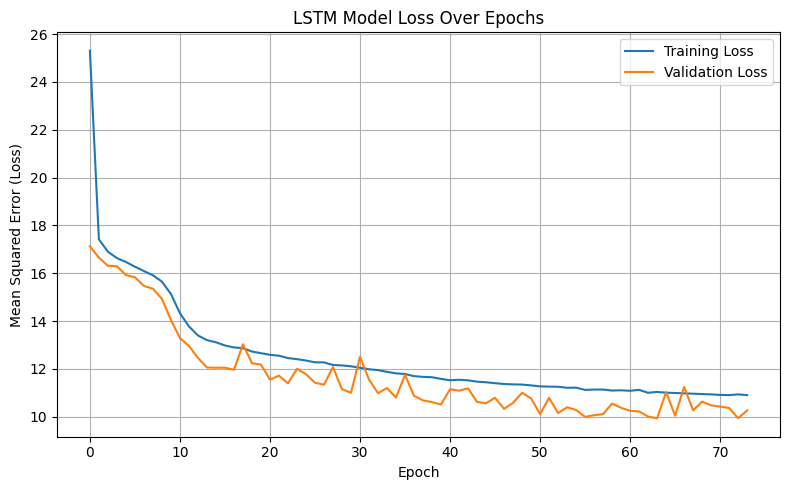

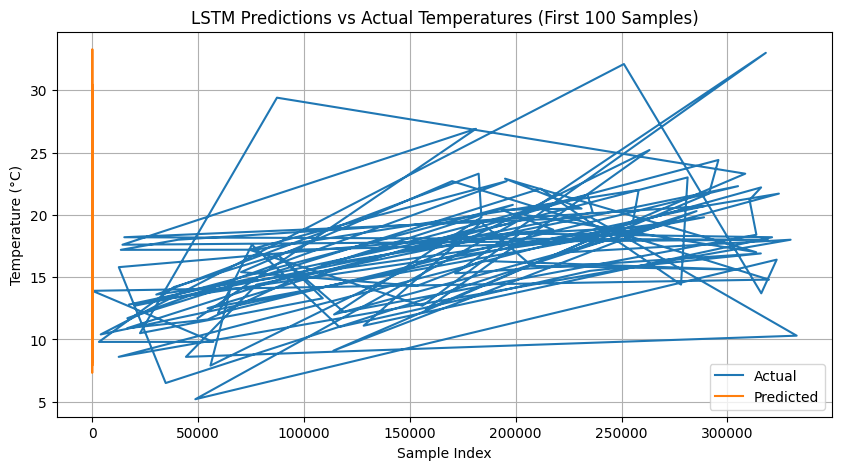

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


def pad_features(df, target_size=25):
    current_size = df.shape[1]
    padding = target_size - current_size
    if padding > 0:
        padding_array = np.zeros((df.shape[0], padding))
        df_padded = np.hstack([df, padding_array])
        return df_padded
    return df

X_train_padded = pad_features(X_train, 25)
X_test_padded = pad_features(X_test, 25)

# We'll treat each row as 1 timestep with 25 features
X_train_lstm = X_train_padded.reshape((X_train_padded.shape[0], 1, X_train_padded.shape[1]))
X_test_lstm = X_test_padded.reshape((X_test_padded.shape[0], 1, X_test_padded.shape[1]))

#Building the LSTM model
model = Sequential([
    LSTM(64, activation='tanh', return_sequences=False, input_shape=(1, X_train_lstm.shape[2])),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

#Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#Train the model
history = model.fit(
    X_train_lstm, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

#Predict and evaluate
y_pred = model.predict(X_test_lstm).flatten()

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f} °C")
print(f"RMSE: {rmse:.2f} °C")
print(f"R² Score: {r2:.4f}")

#Plot training vs validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (Loss)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Plot predicted vs actual
plt.figure(figsize=(10, 5))
plt.plot(y_test[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')
plt.title('LSTM Predictions vs Actual Temperatures (First 100 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()
